# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-09-13 09:00:03.780531


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 9/12/20


,9/12/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,6485214,193693,2.99
Brazil,4315687,131210,3.04
India,4754356,78586,1.65
Mexico,663973,70604,10.63
United Kingdom,367592,41712,11.35
Italy,286297,35603,12.44
France,402811,30902,7.67


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 9/12/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
40652,US,6396100,2020-09-10,191766.0,907.0,35888.0,35154.857143
40651,US,6360212,2020-09-09,190859.0,1206.0,33203.0,35243.142857
40650,US,6327009,2020-09-08,189653.0,445.0,26387.0,36167.000000
40649,US,6300622,2020-09-07,189208.0,267.0,24257.0,38576.428571
40648,US,6276365,2020-09-06,188941.0,403.0,31395.0,39990.571429
40647,US,6244970,2020-09-05,188538.0,783.0,44452.0,40553.714286
40646,US,6200518,2020-09-04,187755.0,965.0,50502.0,40939.571429


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 9/12/20


,9/12/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,443640,33023.0,7.44
New Jersey,196337,16027.0,8.16
Texas,677716,14332.0,2.11
California,758933,14327.0,1.89
Florida,661571,12600.0,1.90
Massachusetts,124540,9196.0,7.38
Illinois,261999,8527.0,3.25


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 9/12/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1407,California,750961,2020-09-10,14077.0,94.0,3671.0,3563.285714
1406,California,747290,2020-09-09,13983.0,160.0,2946.0,3715.571429
1405,California,744344,2020-09-08,13823.0,65.0,3379.0,4103.857143
1404,California,740965,2020-09-07,13758.0,27.0,2109.0,4070.000000
1403,California,738856,2020-09-06,13731.0,22.0,3542.0,4700.714286
1402,California,735314,2020-09-05,13709.0,71.0,4652.0,4753.714286
1401,California,730662,2020-09-04,13638.0,145.0,4644.0,4753.857143


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 9/12/20


,9/12/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,253176,6197.0,2.45
Riverside,55073,1103.0,2.00
Orange,50760,1093.0,2.15
San Bernardino,50543,814.0,1.61
San Diego,42414,734.0,1.73
San Joaquin,19019,383.0,2.01
Sacramento,20063,350.0,1.74


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 9/12/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
4462,Los Angeles,251024,2020-09-10,6128.0,38.0,1165.0,860.714286
4461,Los Angeles,249859,2020-09-09,6090.0,54.0,618.0,846.285714
4460,Los Angeles,249241,2020-09-08,6036.0,6.0,420.0,960.000000
4459,Los Angeles,248821,2020-09-07,6030.0,25.0,487.0,1007.571429
4458,Los Angeles,248334,2020-09-06,6005.0,5.0,792.0,1083.571429
4457,Los Angeles,247542,2020-09-05,6000.0,23.0,1135.0,1112.285714
4456,Los Angeles,246407,2020-09-04,5977.0,45.0,1408.0,1135.571429
4455,Los Angeles,244999,2020-09-03,5932.0,54.0,1064.0,1144.714286
4454,Los Angeles,243935,2020-09-02,5878.0,49.0,1414.0,1221.285714
4453,Los Angeles,242521,2020-09-01,5829.0,45.0,753.0,1249.142857



7 day new US cases as of 9/12/20


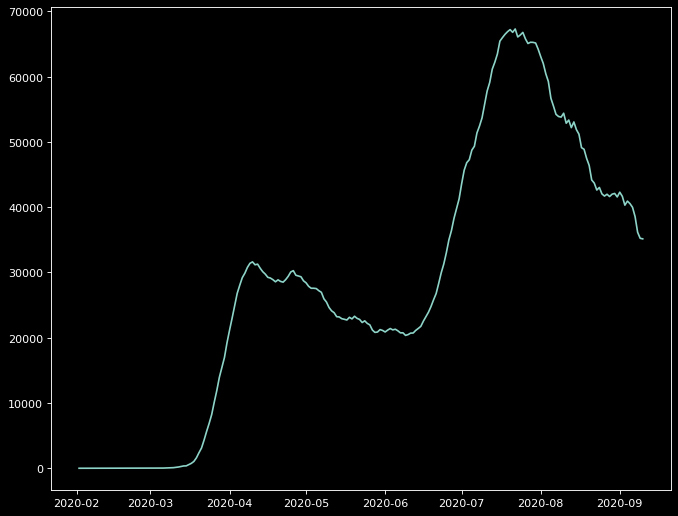

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 9/12/20


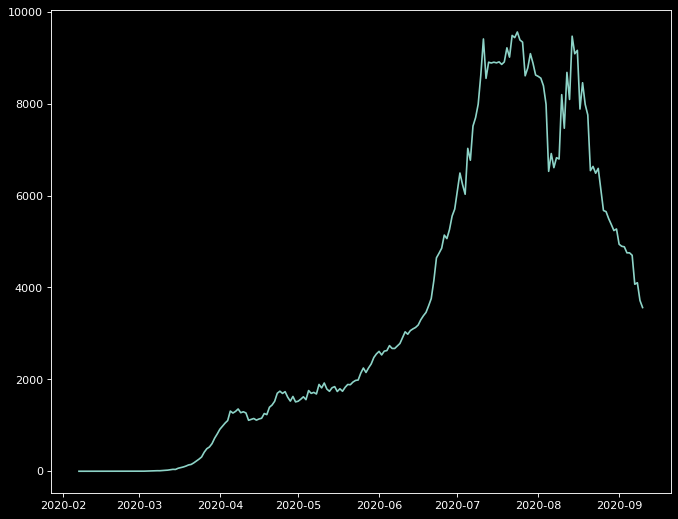

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 9/12/20


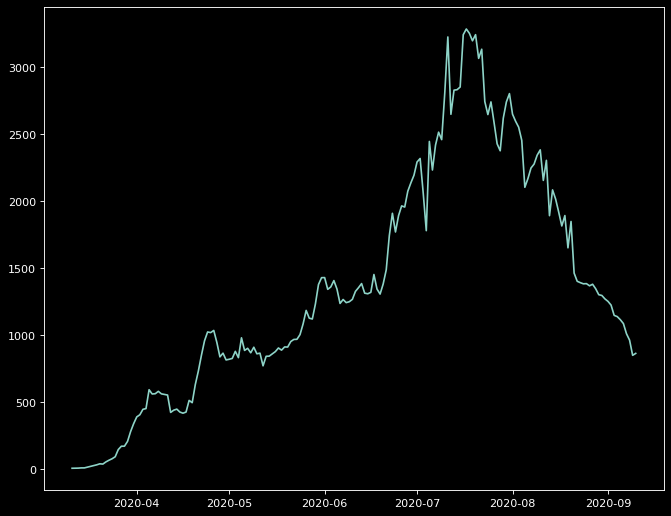

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()